# Travelling Salesman Problem using Genetic Algorithm

#### Import libraries

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from math import sqrt
import operator
import matplotlib.animation as animation
import time
%matplotlib inline 

Class is created for locations or cities

In [2]:
class Location:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def calcDistance(self, c):
        return sqrt((self.x - c.x)**2 + (self.y - c.y)**2)
    
    def dispLoc(self):
        return (self.x, self.y)    

### Generate Initial Population from set of locations

In [3]:
def generateInitialPopulation(locations, population_size):
    initial_population = []
    for i in range(0, population_size):
        initial_population.append(random.sample(locations, len(locations)))
    return  initial_population        

### Fitness calculation

Here, we calculate the total distance to be covered between all the datapoints using the pythagoras theorem. The inverse of the score is taken since high fitness is given to the population which covers all the locations in minimum distance. The fitness score is inversely related to the total distance.

In [4]:
def calcFitness(locations):
    score = 0.0
    for i in range(len(locations)):
        f = 0.0
        if i == len(locations)-1:
            f = locations[i].calcDistance(locations[0])
        else:
            f = locations[i].calcDistance(locations[i+1])
        score += f
    score = (1/score)
    return score

### Selection

In [5]:
def Selection(population, elite_size):
    fitness_values = {}
    selection_pool = []
    for i in range(len(population)):
        fitness_values[i] = calcFitness(population[i])
    sorted_fitness = sorted(fitness_values.items(), key = operator.itemgetter(1), reverse = True)
    df = pd.DataFrame(np.array(sorted_fitness), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    for i in range(0, elite_size):
        selection_pool.append(population[sorted_fitness[i][0]])
    for i in range(0, len(sorted_fitness) - elite_size):
        pick = 100*random.random()
        for i in range(0, len(sorted_fitness)):
            if pick <= df.iat[i,3]:
                selection_pool.append(population[sorted_fitness[i][0]])
                break  
    return selection_pool

### Mating

In [6]:
def Mating(sel_pool, elite_size):
    offsprings = sel_pool[:elite_size]
    new_pool = random.sample(sel_pool, len(sel_pool))   #retain the best routes using ellitism
    for i in range(0, len(sel_pool)-elite_size):
        a = int(random.random()*len(new_pool[i]))
        b = int(random.random()*len(new_pool[len(sel_pool)-i-1]))
        new_off = new_pool[i][min(a,b):max(a,b)]
        new_off += [i for i in new_pool[len(sel_pool)-i-1] if i not in new_off]
        offsprings.append(new_off)
    return offsprings

### Mutation

In [7]:
def Mutate(offsprings, mutation_rate):
    for i in range(len(offsprings)):
        for j in range(len(offsprings[i])):
            if(random.random() < mutation_rate):
                rand = int(random.random()*len(offsprings[i]))
                temp = offsprings[i][rand]
                offsprings[i][rand] = offsprings[i][j]
                offsprings[i][j] = temp
    return offsprings                

### TSA GA

In [8]:
new_pop=[]
def TSA_GA(num_location, population_size, elite_size, mutation_rate, num_generations):
    location = []
    dist = []
    # Generate random locations dataset
    for i in range(num_location):
        (x, y) = (int(random.random()*100), int(random.random()*100))
        location.append(Location(x, y))
    # Generation random population from the generated location datapoints
    population = generateInitialPopulation(location, population_size)
    print("Initial Distance:", str(1/calcFitness(population[0])))
    for i in range(num_generations):
        sel = Selection(population, elite_size)     # Sorting the population pool based on the fitness score
        dist.append((1/calcFitness(sel[0])))        # Appending the minimum distance in each generation for visualization
        offsprings = Mating(sel, elite_size)        # Generating offsprings for the next generation
        new_pop = Mutate(offsprings, mutation_rate) # Mutating the offsprings by randomly swapping locations
        population = new_pop
    print("Final Distance:", str(1/calcFitness(offsprings[0])))
    print("Best route:")
    for i in sel[0]:
        print(i.dispLoc())
    return dist, sel[0]
    

Read the configurations from the config.json which consists the following parameters.
```
{
	"num_location" : 20,
	"elite_size" : 20,
	"num_generations" : 500,
	"population_size" : 100,
	"mutation_rate" : 0.01
}```

The parameters can be modified by changing the values directly in the config.json

In [9]:
with open('config.json') as json_data_file:
    data = json.load(json_data_file)
dist, path = TSA_GA(data['num_location'], data['population_size'], data['elite_size'], data['mutation_rate'], data['num_generations'])
path = [i.dispLoc() for i in path]

Initial Distance: 1152.6433320450774
Final Distance: 431.95541307323396
Best route:
(6, 65)
(0, 80)
(20, 71)
(35, 40)
(62, 24)
(68, 17)
(65, 13)
(60, 12)
(67, 6)
(85, 12)
(76, 20)
(75, 32)
(72, 45)
(95, 82)
(82, 98)
(41, 72)
(21, 45)
(7, 15)
(5, 9)
(0, 48)


### Results

#### Graph between the Minimum distance to be covered vs Generation

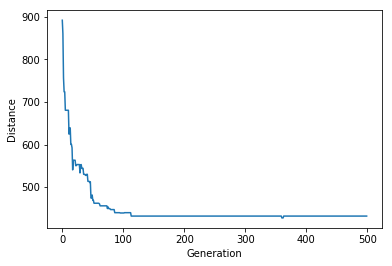

In [10]:
def plotGraph(dist, generation):
    plt.plot(dist)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
plotGraph(dist, generation = data['num_generations'])

#### Plot of the shortest path to cover all the locations

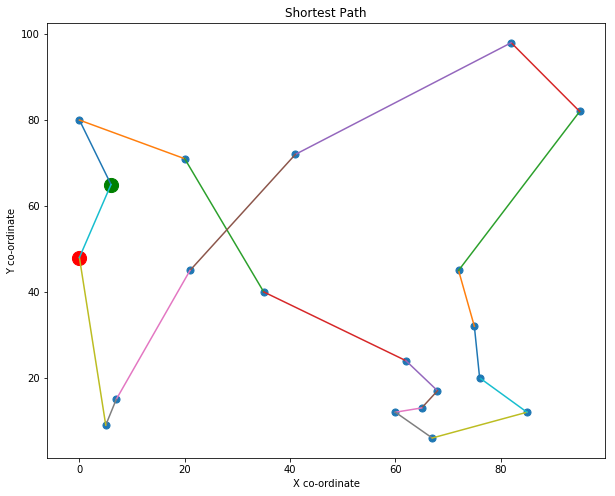

In [11]:
x = []
y = []
for i in path:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 8))
plt.scatter(x, y, marker ='o', s=50)
plt.scatter(x[0], y[0], marker ='o', color='green', s=200)
plt.scatter(x[-1], y[-1], marker ='o', color='red', s=200)
plt.ylabel('Y co-ordinate')
plt.xlabel('X co-ordinate')
plt.title("Shortest Path")
for i in range(len(path)):
    if i == len(path) - 1:
        plt.plot([path[i][0], path[0][0]], [path[i][1], path[0][1]])
    else:
        plt.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]])
    
plt.show()
    


Green dot denotes the starting place
Red dot denotes the destination location